In [64]:
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium.plugins import FastMarkerCluster

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('data/West_Nile_Virus_by_County.csv')

In [7]:
data

,Year,Week_Reported,County,id,Positive_Cases
0,2006,35,Alameda,6001,1
1,2006,33,Butte,6007,4
2,2006,34,Butte,6007,1
3,2006,35,Butte,6007,10
4,2006,36,Butte,6007,2
...,...,...,...,...,...
1390,2015,40,Yolo,6113,1
1391,2015,48,Yolo,6113,1
1392,2015,34,Yuba,6115,4
1393,2015,36,Yuba,6115,3


In [4]:
data.County.nunique()

46

### Merge with lat/lng information

In [24]:
us_counties = pd.read_csv('data/uscounties.csv')
ca_counties = us_counties[us_counties.state_id=='CA']
ca_counties = ca_counties[['county', 'lat', 'lng']]

In [26]:
ca_counties.head()

,county,lat,lng
0,Los Angeles,34.3207,-118.2248
4,San Diego,33.0341,-116.7353
5,Orange,33.7030,-117.7611
9,Riverside,33.7437,-115.9938
13,San Bernardino,34.8414,-116.1784


In [48]:
counties = data.merge(ca_counties, how='left', left_on='County', right_on='county')
counties = counties.set_index('Year')

In [50]:
counties = counties[['county', 'lat', 'lng', 'Positive_Cases']]
counties

,county,lat,lng,Positive_Cases
Year,,,,
2006,Alameda,37.6469,-121.8889,1
2006,Butte,39.6669,-121.6007,4
2006,Butte,39.6669,-121.6007,1
2006,Butte,39.6669,-121.6007,10
2006,Butte,39.6669,-121.6007,2
...,...,...,...,...
2015,Yolo,38.6866,-121.9016,1
2015,Yolo,38.6866,-121.9016,1
2015,Yuba,39.2690,-121.3513,4


In [72]:
counties.T

Year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
county,Alameda,Butte,Butte,Butte,Butte,Butte,Butte,Butte,Butte,Colusa,...,Ventura,Yolo,Yolo,Yolo,Yolo,Yolo,Yolo,Yuba,Yuba,Yuba
lat,37.6469,39.6669,39.6669,39.6669,39.6669,39.6669,39.6669,39.6669,39.6669,39.1775,...,34.4565,38.6866,38.6866,38.6866,38.6866,38.6866,38.6866,39.269,39.269,39.269
lng,-121.8889,-121.6007,-121.6007,-121.6007,-121.6007,-121.6007,-121.6007,-121.6007,-121.6007,-122.237,...,-119.0836,-121.9016,-121.9016,-121.9016,-121.9016,-121.9016,-121.9016,-121.3513,-121.3513,-121.3513
Positive_Cases,1,4,1,10,2,8,3,2,1,1,...,1,1,2,1,2,1,1,4,3,1


### Visualize historical total cases

In [59]:
total = counties.groupby(['county', 'lat', 'lng']).Positive_Cases.size().reset_index(name='Total')

In [73]:
total.T.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
county,Alameda,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,Imperial,...,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Tulare,Ventura,Yolo,Yuba
lat,37.6469,38.4464,39.6669,38.2046,39.1775,37.9191,38.7787,36.7582,39.5982,33.0395,...,41.5927,38.27,38.5283,37.5591,39.0346,40.1256,36.2201,34.4565,38.6866,39.269
lng,-121.8889,-120.6511,-121.6007,-120.5541,-122.237,-121.9278,-120.5247,-119.6493,-122.392,-115.3654,...,-122.5404,-121.9329,-122.8874,-120.9977,-121.6948,-122.2341,-118.8005,-119.0836,-121.9016,-121.3513
Total,6,1,69,1,15,34,6,84,41,7,...,2,10,1,98,27,21,49,15,36,22


Text(0.5, 1.0, 'Total Cases')

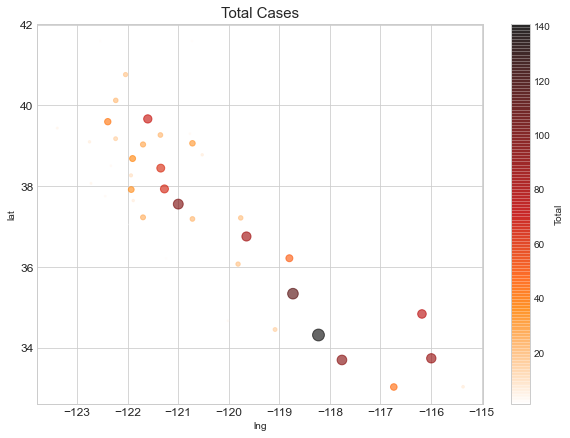

In [71]:
total.plot(kind="scatter", x="lng", y="lat", 
                alpha=0.6, figsize=(10,7), c="Total", 
                s=total['Total'], cmap="gist_heat_r", 
                colorbar=True, sharex=False, fontsize=12)
plt.title('Total Cases', fontsize=15)

In [70]:
x_ca = total['lat'].tolist()
y_ca = total['lng'].tolist()
loc_ca = list(zip(x_ca, y_ca))

map_ca = folium.Map(location=[36.7783, -119.4179], 
                   popup=total['Total'].tolist(),
                   zoom_start=11.5,
                      width=750, height=500)
FastMarkerCluster(data=loc_ca).add_to(map_ca)
#map_oahu.save('map_oahu.html')
map_ca

### Heat Map with time slider 

In [51]:
# list all the data points groupby date
prepare_map_counties = counties.groupby('Year').agg(lambda x: list(x))
prepare_map_counties.head()

,county,lat,lng,Positive_Cases
Year,,,,
2006,"[Alameda, Butte, Butte, Butte, Butte, Butte, B...","[37.6469, 39.6669, 39.6669, 39.6669, 39.6669, ...","[-121.8889, -121.6007, -121.6007, -121.6007, -...","[1, 4, 1, 10, 2, 8, 3, 2, 1, 1, 1, 1, 3, 1, 1,..."
2007,"[Butte, Butte, Butte, Butte, Butte, Butte, But...","[39.6669, 39.6669, 39.6669, 39.6669, 39.6669, ...","[-121.6007, -121.6007, -121.6007, -121.6007, -...","[2, 4, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 2, 3, 2, ..."
2008,"[Alameda, Butte, Butte, Butte, Butte, Butte, C...","[37.6469, 39.6669, 39.6669, 39.6669, 39.6669, ...","[-121.8889, -121.6007, -121.6007, -121.6007, -...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
2009,"[Butte, Butte, Contra Costa, Contra Costa, El ...","[39.6669, 39.6669, 37.9191, 37.9191, 38.7787, ...","[-121.6007, -121.6007, -121.9278, -121.9278, -...","[1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 1, ..."
2010,"[Alameda, Butte, Contra Costa, Contra Costa, F...","[37.6469, 39.6669, 37.9191, 37.9191, 36.7582, ...","[-121.8889, -121.6007, -121.9278, -121.9278, -...","[1, 1, 3, 1, 2, 2, 4, 3, 5, 1, 3, 1, 1, 1, 2, ..."


In [74]:
prepare_map_counties.T

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
county,"[Alameda, Butte, Butte, Butte, Butte, Butte, B...","[Butte, Butte, Butte, Butte, Butte, Butte, But...","[Alameda, Butte, Butte, Butte, Butte, Butte, C...","[Butte, Butte, Contra Costa, Contra Costa, El ...","[Alameda, Butte, Contra Costa, Contra Costa, F...","[Amador, Butte, Butte, Butte, Contra Costa, Co...","[Alameda, Alameda, Butte, Butte, Butte, Butte,...","[Butte, Butte, Butte, Butte, Butte, Butte, But...","[Alameda, Butte, Butte, Butte, Butte, Butte, B...","[Butte, Butte, Butte, Butte, Butte, Butte, But..."
lat,"[37.6469, 39.6669, 39.6669, 39.6669, 39.6669, ...","[39.6669, 39.6669, 39.6669, 39.6669, 39.6669, ...","[37.6469, 39.6669, 39.6669, 39.6669, 39.6669, ...","[39.6669, 39.6669, 37.9191, 37.9191, 38.7787, ...","[37.6469, 39.6669, 37.9191, 37.9191, 36.7582, ...","[38.4464, 39.6669, 39.6669, 39.6669, 37.9191, ...","[37.6469, 37.6469, 39.6669, 39.6669, 39.6669, ...","[39.6669, 39.6669, 39.6669, 39.6669, 39.6669, ...","[37.6469, 39.6669, 39.6669, 39.6669, 39.6669, ...","[39.6669, 39.6669, 39.6669, 39.6669, 39.6669, ..."
lng,"[-121.8889, -121.6007, -121.6007, -121.6007, -...","[-121.6007, -121.6007, -121.6007, -121.6007, -...","[-121.8889, -121.6007, -121.6007, -121.6007, -...","[-121.6007, -121.6007, -121.9278, -121.9278, -...","[-121.8889, -121.6007, -121.9278, -121.9278, -...","[-120.6511, -121.6007, -121.6007, -121.6007, -...","[-121.8889, -121.8889, -121.6007, -121.6007, -...","[-121.6007, -121.6007, -121.6007, -121.6007, -...","[-121.8889, -121.6007, -121.6007, -121.6007, -...","[-121.6007, -121.6007, -121.6007, -121.6007, -..."
Positive_Cases,"[1, 4, 1, 10, 2, 8, 3, 2, 1, 1, 1, 1, 3, 1, 1,...","[2, 4, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 2, 3, 2, ...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...","[1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 1, ...","[1, 1, 3, 1, 2, 2, 4, 3, 5, 1, 3, 1, 1, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, ...","[1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 5, 1, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 3, 4, 3, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 10, 14, 6, 2, 2, 2, 1, 4, 1, 2, 1, 1, 1..."


In [52]:
def generate_draw_points(df):
    """
    Generate a list of list of points to draw timestamped heatmap for folium
    Each single point is in a form of [latitude, longitude, weight]
    """
    to_draw = []
    for i in range(df.shape[0]):
        single_draw = []
        for j in list(zip(df.iloc[i].lat, df.iloc[i].lng, df.iloc[i].Positive_Cases)):
            single_draw.append(list(j))
        to_draw.append(single_draw)
        
    time_index = []
    for t in df.index:
        time_index.append(t)
        
    return to_draw, time_index

In [56]:
# prepare data for folium
points, indice = generate_draw_points(prepare_map_counties)[0], generate_draw_points(prepare_map_counties)[1]

# create folium object and add timestamp object
time_map = folium.Map([36.7783, -119.4179], zoom_start=6)
hm = plugins.HeatMapWithTime(points, index=indice, auto_play=True, max_opacity=0.6)
hm.add_to(time_map)

# display map
time_map